#### It is widely known that women do more unpaid work (household chores or shopping) than men globally. 

#### In this project, I want to explore how does the gender gap in unpaid work look like in OECD countries and some non-OECD countries and whether it is associated with the education level of women in that country.

#### * Source of dataset: OECD Employment Statistics https://stats.oecd.org/index.aspx?queryid=54757
#### * Each row represents in 2018-2019, the daily time spent in one type of work(paid/unpaid/total) of each OECD country by men/women.
#### * The relevant columns are Country, Indicator (type of work), Sex, Unit(minutes per day) and Value (how many minutes).

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import altair as alt
import numpy as np
matplotlib.rcParams['pdf.fonttype'] = 42

In [2]:
df = pd.read_csv('GENDER_EMP_25102019220340247.csv',
                 usecols = ['Country','Indicator','Indicator','Sex','Unit','Value'])

In [3]:
df.head()

,Country,Indicator,Sex,Unit,Value
0,Australia,"Time spent in unpaid work, by sex",Men,Minutes per day,171.6
1,Australia,"Time spent in unpaid work, by sex",Women,Minutes per day,311.0
2,Australia,"Time spent in paid work, by sex",Men,Minutes per day,304.1
3,Australia,"Time spent in paid work, by sex",Women,Minutes per day,172.0
4,Australia,"Time spent in total work, by sex",Men,Minutes per day,475.7


#### * Source of dataset: OECD Education Statistics https://stats.oecd.org/Index.aspx?QueryId=70670
#### * Each row in the dataset represents in 2018 in each OECD country, what is the percentage of men/women who have at least upper secondary education in each age group.
#### * The columns relevant to the analysis are Country, Gender(men/women), Age (25-64 years, 25-34 years, 35-44 years, 45-54 years, 55-64 years), Unit(percentage), Value.

In [4]:
df2 = pd.read_csv('EAG_NEAC_07122019060430709.csv',
                 usecols = ['Country','Gender','Age','Unit','Value'])

In [5]:
df2.head()

,Country,Gender,Age,Unit,Value
0,Austria,Women,55-64 years,Percentage,72.283218
1,Belgium,Women,55-64 years,Percentage,65.156082
2,Canada,Women,55-64 years,Percentage,88.262909
3,Czech Republic,Women,55-64 years,Percentage,87.115463
4,Denmark,Women,55-64 years,Percentage,74.887962


In [6]:
# First, we need to clean the primary dataset by only selecting "unpaid work".
df_unpaid = df[df.Indicator=='Time spent in unpaid work, by sex']

In [7]:
# Then, in order to put one country in a row, 
# we put men and women in two different sets and merge them together.
df_unpaid_men = df_unpaid[df_unpaid.Sex == 'Men']
df_unpaid_women = df_unpaid[df_unpaid.Sex == 'Women']

In [8]:
df_unpaid_2 = pd.merge(df_unpaid_men, df_unpaid_women, on = 'Country')

In [9]:
df_unpaid_2.head()

,Country,Indicator_x,Sex_x,Unit_x,Value_x,Indicator_y,Sex_y,Unit_y,Value_y
0,Australia,"Time spent in unpaid work, by sex",Men,Minutes per day,171.6,"Time spent in unpaid work, by sex",Women,Minutes per day,311.0
1,Austria,"Time spent in unpaid work, by sex",Men,Minutes per day,135.3,"Time spent in unpaid work, by sex",Women,Minutes per day,269.2
2,Belgium,"Time spent in unpaid work, by sex",Men,Minutes per day,144.2,"Time spent in unpaid work, by sex",Women,Minutes per day,237.3
3,Canada,"Time spent in unpaid work, by sex",Men,Minutes per day,148.1,"Time spent in unpaid work, by sex",Women,Minutes per day,223.7
4,Denmark,"Time spent in unpaid work, by sex",Men,Minutes per day,186.1,"Time spent in unpaid work, by sex",Women,Minutes per day,242.8


In [10]:
# Rename the columns to make them more readable
df_unpaid_2.rename(columns={'Value_x':'Men',
                          'Value_y':'Women',
                          'Indicator_x':'Indicator',
                           'Unit_x':'Unit'}, 
                 inplace=True)

In [11]:
# Choose the columns we need
df_unpaid_2 = df_unpaid_2[['Country','Indicator','Unit','Men','Women']]

In [12]:
# Add a gap column to store the time difference between women and men in each country
df_unpaid_2['gap'] = df_unpaid_2['Women'] - df_unpaid_2['Men']

In [13]:
# By now, we have the dataset for gender gap in unpaid work for each country.
df_unpaid_2.head()

,Country,Indicator,Unit,Men,Women,gap
0,Australia,"Time spent in unpaid work, by sex",Minutes per day,171.6,311.0,139.4
1,Austria,"Time spent in unpaid work, by sex",Minutes per day,135.3,269.2,133.9
2,Belgium,"Time spent in unpaid work, by sex",Minutes per day,144.2,237.3,93.1
3,Canada,"Time spent in unpaid work, by sex",Minutes per day,148.1,223.7,75.6
4,Denmark,"Time spent in unpaid work, by sex",Minutes per day,186.1,242.8,56.7


In [14]:
# Second dataset: we need to get data for women in each country of the "25-64 years" Age group 
# because it is the age group pf the first data.
df2.head()

,Country,Gender,Age,Unit,Value
0,Austria,Women,55-64 years,Percentage,72.283218
1,Belgium,Women,55-64 years,Percentage,65.156082
2,Canada,Women,55-64 years,Percentage,88.262909
3,Czech Republic,Women,55-64 years,Percentage,87.115463
4,Denmark,Women,55-64 years,Percentage,74.887962


In [15]:
df_women_education = df2[df2.Age=='25-64 years'][df2.Gender == 'Women']

/Users/leiao/.pyenv/versions/3.7.1/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [16]:
# Now we get the data for women's high education percentage in each country
df_women_education = df_women_education[['Country','Gender','Unit','Value']]
df_women_education.head()

,Country,Gender,Unit,Value
254,Brazil,Women,Percentage,54.256882
258,Czech Republic,Women,Percentage,92.629318
332,Australia,Women,Percentage,81.452705
336,Finland,Women,Percentage,91.739769
365,Japan,Women,Percentage,NaN


In [17]:
#we merge the first unpaid work dataset and the second education dataset together
df_final = pd.merge(df_unpaid_2, df_women_education, on = 'Country')

In [18]:
df_final.head()

,Country,Indicator,Unit_x,Men,Women,gap,Gender,Unit_y,Value
0,Australia,"Time spent in unpaid work, by sex",Minutes per day,171.6,311.0,139.4,Women,Percentage,81.452705
1,Austria,"Time spent in unpaid work, by sex",Minutes per day,135.3,269.2,133.9,Women,Percentage,81.945152
2,Belgium,"Time spent in unpaid work, by sex",Minutes per day,144.2,237.3,93.1,Women,Percentage,79.090614
3,Canada,"Time spent in unpaid work, by sex",Minutes per day,148.1,223.7,75.6,Women,Percentage,93.031425
4,Denmark,"Time spent in unpaid work, by sex",Minutes per day,186.1,242.8,56.7,Women,Percentage,83.820114


In [19]:
#rename the columns and take the columns that we need
df_final.rename(columns={'Men':'Men_unpaid_min',
                          'Women':'Women_unpaid_min',
                          'gap':'Gap_min',
                           'Value':'High_Education_women_percent'}, 
                 inplace=True)

In [20]:
df_final = df_final[['Country','Men_unpaid_min','Women_unpaid_min','Gap_min','High_Education_women_percent']]

In [21]:
# This is our Final dataset!
# with the data of each country's gender gap in time spent in unpaid work 
# and percentage of relatively high education of women 
df_final.head()

,Country,Men_unpaid_min,Women_unpaid_min,Gap_min,High_Education_women_percent
0,Australia,171.6,311.0,139.4,81.452705
1,Austria,135.3,269.2,133.9,81.945152
2,Belgium,144.2,237.3,93.1,79.090614
3,Canada,148.1,223.7,75.6,93.031425
4,Denmark,186.1,242.8,56.7,83.820114


In [27]:
# Chart 1 is a visualization of the gender gap of time spent in unpaid work of the countries 
# to get a general idea of how serious the problem is.

# First, we sort the dataset by the gender gap in unpaid work, from maximum to minimum and reset index  
df_final = df_final.sort_values(by= 'Gap_min', ascending=False).reset_index()

In [23]:
df_final.head()

,index,Country,Men_unpaid_min,Women_unpaid_min,Gap_min,High_Education_women_percent
0,27,India,51.8,351.9,300.1,21.228489
1,14,Mexico,136.7,383.3,246.6,38.564968
2,22,Turkey,67.6,305.0,237.4,36.134773
3,19,Portugal,96.3,328.2,231.9,54.425732
4,12,Japan,40.8,224.3,183.5,NaN


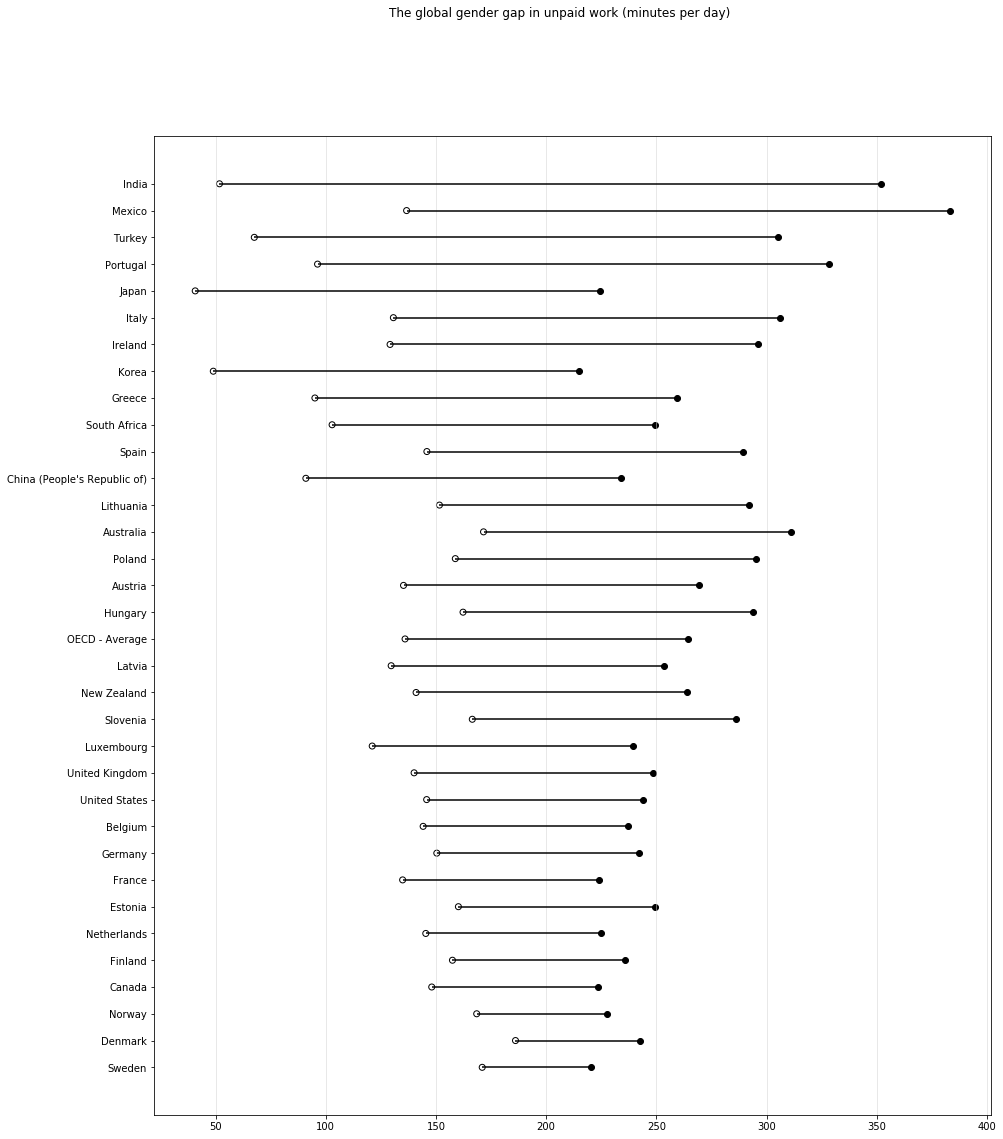

In [24]:
# Then, we plot the dataset, x-axis is minutes per day for unpaid work, y-axis are country names, 
# empty dots represents men, black dots represents women, 
# and the length of each line is the gender gap of each country.

fig, ax = plt.subplots(figsize=(15, 18))
fig.suptitle('The global gender gap in unpaid work (minutes per day)')
ax.hlines(xmin=df_final['Men_unpaid_min'], xmax=df_final['Women_unpaid_min'], y=df_final.index)
ax.scatter(x=df_final['Men_unpaid_min'], y=df_final.index, facecolors='none', edgecolors='black')
ax.scatter(x=df_final['Women_unpaid_min'], y=df_final.index,color='black')
ax.set_yticks(df_final.index)
ax.yaxis.set_ticklabels(df_final['Country'])
ax.grid('on', axis='x', which='major', linestyle='-', linewidth='0.5', color='lightgrey')
ax.invert_yaxis()
plt.savefig("Gender_gap_unpaid_work.svg",bbox_inches = 'tight')

In [25]:
# Chart 2 is to explore the relationship between the gender gap and women's education level
df_final.head()

,index,Country,Men_unpaid_min,Women_unpaid_min,Gap_min,High_Education_women_percent
0,27,India,51.8,351.9,300.1,21.228489
1,14,Mexico,136.7,383.3,246.6,38.564968
2,22,Turkey,67.6,305.0,237.4,36.134773
3,19,Portugal,96.3,328.2,231.9,54.425732
4,12,Japan,40.8,224.3,183.5,NaN


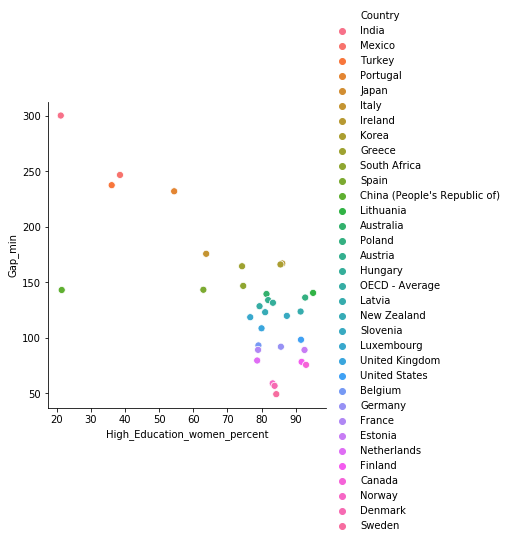

In [26]:
# Use a scatterplot to show the relationship between the two indicators
# xaxis represents the percentage of women with relatively high education in each country
# yaxis represents the gender gap in time spent in unpaid work in each country
sns.relplot(data=df_final, x='High_Education_women_percent', y='Gap_min', hue=df_final.Country, s=50)
plt.savefig("unpaid_gap_education.pdf")

#### *Conclusions:

####  From Chart 1, we could know that in the OECD and several non-OECD countries we covered, women universally spent more time in unpaid work than men. India has the largest gender gap while Sweden has the smallest.

####  From Chart 2, we could see that gender gap in unpaid work is somewhat negatively associated with high education level of women in the country. The countries with the largest gender gaps are usually countries with least ratio of women with higher education. So from the policy perspective, increase education level of women may promote gender equality in unpaid work.